# Educational in English Towns

## Setup: Libraries and Data  

In [1]:
import numpy as  np
import pandas as pd
import plotly.express as px


###   Raw data

In [4]:
durl = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-23/english_education.csv"
dfr = pd.read_csv(durl);
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 31 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   town11cd                                                           1100 non-null   object 
 1   town11nm                                                           1104 non-null   object 
 2   population_2011                                                    1100 non-null   float64
 3   size_flag                                                          1104 non-null   object 
 4   rgn11nm                                                            1102 non-null   object 
 5   coastal                                                            1100 non-null   object 
 6   coastal_detailed                                                   1100 non-null   object 
 7   ttwa11cd                

### Columns Selection: dfs

In [106]:
dfs = dfr.loc[:, ('town11nm', 'population_2011', 'size_flag', 'rgn11nm', 'coastal', 'job_density_flag', 'income_flag', 
     'level4qual_residents35_64_2011', 'education_score', 'activity_at_age_19_employment_with_earnings_above_10_000')]

In [107]:
dfr.isnull().sum()

town11cd                                                               4
town11nm                                                               0
population_2011                                                        4
size_flag                                                              0
rgn11nm                                                                2
coastal                                                                4
coastal_detailed                                                       4
ttwa11cd                                                               4
ttwa11nm                                                               4
ttwa_classification                                                    4
job_density_flag                                                       4
income_flag                                                            4
university_flag                                                        4
level4qual_residents35_64_2011                     

### Columns Renaming

In [150]:
#df.columns = df.columns.str.replace("old", "new")
#df.rename(columns={"old1": "new1", "old2": "new2"}, inplace=True)
#df.set_axis(["new1", "new2"], axis="columns", inplace=True)
dfs.columns = ["code", "pop2011", "size", "region", "coastal", "jobcat", "income", "resid_3564_q4", "score", "earning"]
dfs.head(2)

,code,pop2011,size,region,coastal,jobcat,income,resid_3564_q4,score,earning
0,Carlton in Lindrick BUA,5456.0,Small Towns,East Midlands,Non-coastal,Residential,Higher deprivation towns,Low,-0.533750,36.923077
1,Dorchester (West Dorset) BUA,19060.0,Small Towns,South West,Non-coastal,Working,Mid deprivation towns,Medium,1.952019,24.686192


In [151]:
dfs.rename(columns={'resid_3564_q4' : 'propL4Q'}, inplace=True)

##  Data Wrangling & Analysis

In [109]:
dfs.describe()

,pop2011,score,earning
count,1.100000e+03,1.104000e+03,1077.000000
mean,3.334663e+04,1.358692e-11,24.264085
std,6.249984e+04,3.610558e+00,6.186254
min,5.003000e+03,-1.002802e+01,7.062147
25%,8.076000e+03,-2.570677e+00,20.000000
50%,1.543600e+04,-2.823641e-01,23.943662
75%,3.272175e+04,2.226506e+00,28.070175
max,1.085810e+06,1.187151e+01,48.979592


### Drop Rows with NAs

In [110]:
dfs.isnull().sum()

code              0
pop2011           4
size              0
region            2
coastal           4
jobcat            4
income            4
resid_3564_q4     4
score             0
earning          27
dtype: int64

In [152]:
dff = dfs.dropna()

In [153]:
dff.isnull().sum()


code       0
pop2011    0
size       0
region     0
coastal    0
jobcat     0
income     0
propL4Q    0
score      0
earning    0
dtype: int64

###  Score and  Earning Distribution

In [154]:
dff[['score', 'earning']].describe()

,score,earning
count,1073.000000,1073.000000
mean,-0.070469,24.286434
std,3.529369,6.176829
min,-10.028015,7.062147
25%,-2.585602,20.021882
50%,-0.309564,23.943662
75%,2.179427,28.125000
max,11.032791,48.979592


Text(0.5, 1.0, 'Education Score')

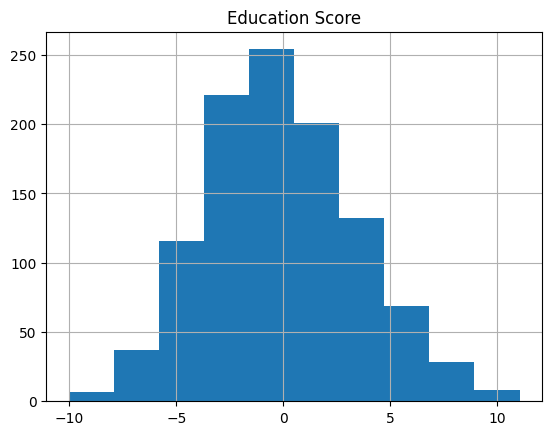

In [114]:
ax = dff['score'].hist()
ax.set_title("Education Score")

array([[<Axes: title={'center': 'score'}>,
        <Axes: title={'center': 'earning'}>]], dtype=object)

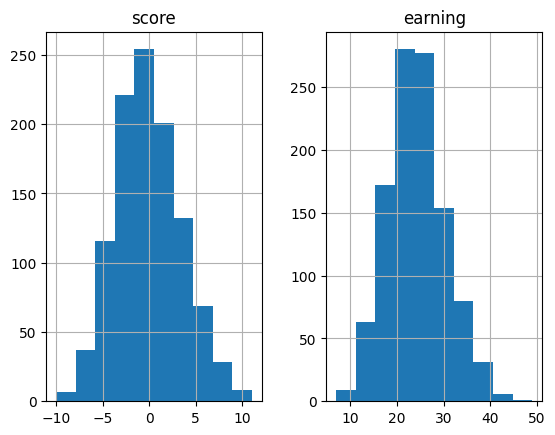

In [115]:
dff[['score', 'earning']].hist()

In [117]:
fig = px.histogram(dff, x="score", title="Education Score", )
fig.update_layout(width=600, height = 400)
fig.show()

In [118]:
fig = px.histogram(dff, x=["score", "earning"], title="Education Score and Earning", )
fig.update_layout(width=600, height = 400)
fig.show()

In [119]:
sdf  = pd.DataFrame({
    'product': ['A', 'B', 'C', 'A', 'B', 'C'],
    'region': ['North', 'North', 'North', 'South', 'South', 'South'],
    'sales': [100, 200, 300, 400, 500, 600]
})
sdf.groupby(['product', 'region'])['sales'].mean()

product  region
A        North     100.0
         South     400.0
B        North     200.0
         South     500.0
C        North     300.0
         South     600.0
Name: sales, dtype: float64

<Axes: title={'center': 'Earning By Region'}>

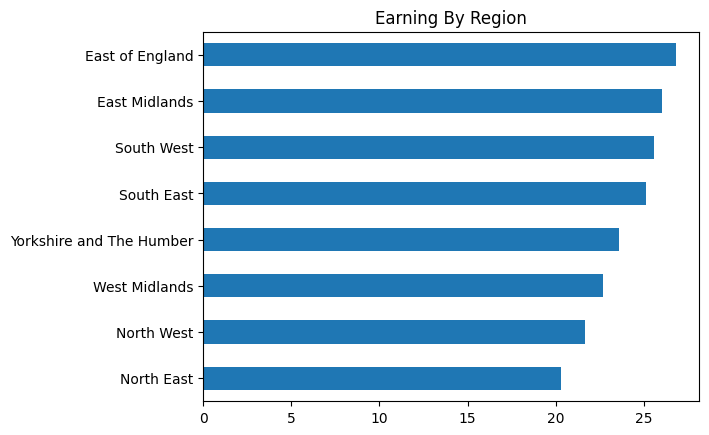

In [143]:
rgn_earning = dff.groupby('region')['earning'].mean().reset_index().sort_values('earning')
rgn_earning.plot.barh(
    x  = 'region', y = 'earning', ylabel = '', legend = '', title  = 'Earning By Region'
    )

Text(0.5, 1.0, 'Earning By Region')

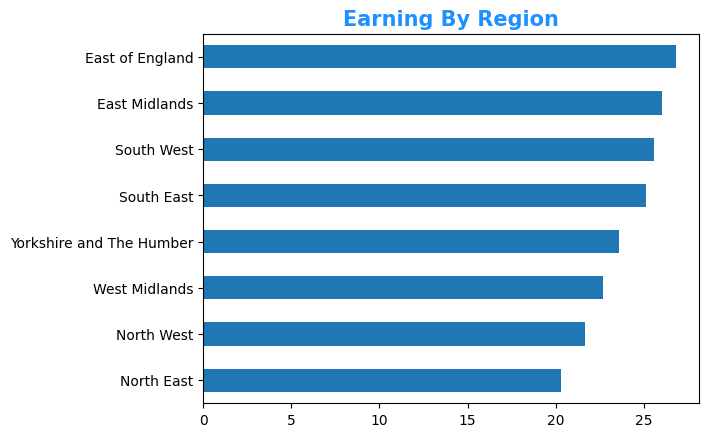

In [146]:
ax = rgn_earning.plot.barh(
    x  = 'region', y = 'earning', ylabel = '', legend = ''
    )
ax.set_title('Earning By Region', fontsize=15, color= 'dodgerblue', fontweight='bold')

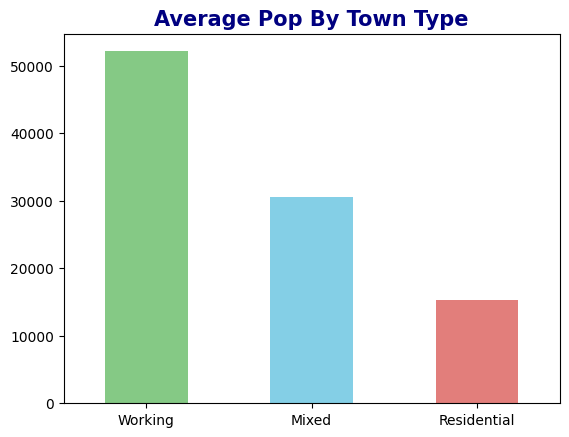

In [166]:
avg_pop = dff.groupby('jobcat')['pop2011'].mean().reset_index().sort_values('pop2011', ascending=False)
ax = avg_pop.plot(
    kind='bar',
    x  = 'jobcat', y = 'pop2011',  xlabel = '', legend = '', alpha=0.75, rot=0, color =['#5cb85c', '#5bc0de',  '#d9534f']
).set_title('Average Pop By Town Type', fontsize=15, color= 'navy', fontweight='bold')

In [185]:
fig = px.bar(rgn_earning, y = 'region', x = 'earning', )
#fig.update_yaxes(visible=False) # #showticklabels=False
fig.update_layout(
    title="<b>Average Earning By Region</b>", 
    width=600, height = 400, yaxis_title=None,
    titlefont_size =24, titlefont_color='#5bc0de', titlefont_family='Arial, sans-serif')
fig.show()


**Plotly Colors and Template**

["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]

In [195]:
#color_continuous_scale=px.colors.sequential.Viridis
#fig = px.colors.qualitative.swatches()
#fig.show()

In [205]:
fig = px.bar(
    avg_pop, x = 'jobcat', y = 'pop2011', color = 'jobcat', 
     color_discrete_sequence=px.colors.qualitative.G10,
     template= 'plotly_dark')
fig.update_layout(
    title="<b>Average Pop By Town Type</b>", 
    showlegend=False,
    width=600, height = 400, xaxis_title=None, yaxis_title='Average  Pop',
    titlefont_size =20, titlefont_color='#5bc0de', titlefont_family='Arial')
fig.show()

In [203]:
fig = px.bar(
    avg_pop, x = 'jobcat', y = 'pop2011', color = 'jobcat', 
     color_discrete_sequence=px.colors.qualitative.G10,
     template= 'plotly_white',
     labels={
                     'jobcat': "Town Types",
                     'pop2011': "Avg Pop"
                 })
fig.update_layout(
    title="<b>Average Pop By Town Type</b>", 
    width=600, height = 400, 
    titlefont_size =20, titlefont_color='#5bc0de', titlefont_family='Arial')
fig.show()


In [129]:
dff.columns

Index(['code', 'pop2011', 'size', 'region', 'coastal', 'jobcat ', 'income',
       'propL4Q', 'score', 'earning'],
      dtype='object')

select(
    code = town11nm,
    pop = population_2011, 
    size = size_flag,
    region = rgn11nm,
    coastal,
    jobcat = job_density_flag,
    income = income_flag,
    resid_3564_q4 = level4qual_residents35_64_2011,
    score = education_score,
    earning = activity_at_age_19_employment_with_earnings_above_10_000)

In [72]:
dfs

,code,pop2011,size,region,coastal,jobcat,income,propL4Q,score,earning
0,Carlton in Lindrick BUA,5456.0,Small Towns,East Midlands,Non-coastal,Residential,Higher deprivation towns,Low,-0.533750,36.923077
1,Dorchester (West Dorset) BUA,19060.0,Small Towns,South West,Non-coastal,Working,Mid deprivation towns,Medium,1.952019,24.686192
2,Ely BUA,19090.0,Small Towns,East of England,Non-coastal,Working,Lower deprivation towns,Medium,-1.044128,27.741935
3,Market Weighton BUA,6429.0,Small Towns,Yorkshire and The Humber,Non-coastal,Residential,Lower deprivation towns,Medium,-1.249262,31.034483
4,Downham Market BUA,10884.0,Small Towns,East of England,Non-coastal,Mixed,Higher deprivation towns,Low,-1.169078,30.107527
...,...,...,...,...,...,...,...,...,...,...
1099,Chester BUASD,86011.0,Large Towns,North West,Non-coastal,Working,Higher deprivation towns,Medium,-0.810935,18.267930
1100,Inner London BUAs,NaN,Inner London BUA,London,NaN,NaN,NaN,NaN,0.067591,10.117743
1101,Outer london BUAs,NaN,Outer london BUA,London,NaN,NaN,NaN,NaN,1.262410,15.551530
1102,Other Small BUAs,NaN,Other Small BUAs,NaN,NaN,NaN,NaN,NaN,1.221877,24.337579
